In [1]:
import pandas as pd
import numpy as np
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
cleaned_df=pd.read_csv("2015_Cleaned.csv")

In [3]:
cleaned_df

,HeartDiseaseorAttack,Age,Sex,Weight,Height,HighChol,HighBP,Stroke,Education,Income,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,BMI,HvyAlcoholConsump,Fruits,Vegetables,PhysActivity
0,0.0,9.0,0.0,127.01,1.78,1.0,1.0,0.0,4.0,3.0,...,1.0,0.0,5.0,18.0,15.0,40.0,0.0,0.0,1.0,0.0
1,0.0,7.0,0.0,74.84,1.73,0.0,0.0,0.0,6.0,1.0,...,0.0,1.0,3.0,0.0,0.0,25.0,0.0,0.0,0.0,1.0
2,0.0,9.0,0.0,81.65,1.70,1.0,1.0,0.0,4.0,8.0,...,1.0,1.0,5.0,30.0,30.0,28.0,0.0,1.0,0.0,0.0
3,0.0,11.0,0.0,65.77,1.57,0.0,1.0,0.0,3.0,6.0,...,1.0,0.0,2.0,0.0,0.0,27.0,0.0,1.0,1.0,1.0
4,0.0,11.0,0.0,67.13,1.68,1.0,1.0,0.0,5.0,4.0,...,1.0,0.0,2.0,3.0,0.0,24.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255184,0.0,5.0,1.0,163.29,1.91,1.0,1.0,0.0,6.0,7.0,...,1.0,0.0,3.0,0.0,5.0,45.0,0.0,1.0,1.0,0.0
255185,0.0,11.0,0.0,47.17,1.60,1.0,1.0,0.0,2.0,4.0,...,1.0,0.0,4.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0
255186,0.0,2.0,0.0,72.57,1.60,0.0,0.0,0.0,5.0,2.0,...,1.0,0.0,1.0,0.0,0.0,28.0,0.0,1.0,0.0,1.0
255187,0.0,7.0,1.0,75.30,1.80,0.0,1.0,0.0,5.0,1.0,...,1.0,0.0,3.0,0.0,0.0,23.0,0.0,1.0,1.0,0.0


In [4]:
cleaned_df.columns

Index(['HeartDiseaseorAttack', 'Age', 'Sex', 'Weight', 'Height', 'HighChol',
       'HighBP', 'Stroke', 'Education', 'Income', 'DiffWalk', 'ADDEPEV2',
       'Diabetes', 'Smoker', '_RFCHOL', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'HvyAlcoholConsump', 'Fruits',
       'Vegetables', 'PhysActivity'],
      dtype='object')

In [5]:
print("Missing values per column:")
print(cleaned_df.isnull().sum())

Missing values per column:
HeartDiseaseorAttack    0
Age                     0
Sex                     0
Weight                  0
Height                  0
HighChol                0
HighBP                  0
Stroke                  0
Education               0
Income                  0
DiffWalk                0
ADDEPEV2                0
Diabetes                0
Smoker                  0
_RFCHOL                 0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
BMI                     0
HvyAlcoholConsump       0
Fruits                  0
Vegetables              0
PhysActivity            0
dtype: int64


In [6]:

df=pd.read_csv("2015_Cleaned.csv")


Recommended Models
Depending on the task, you could try the following:

Classification (Predict HeartDiseaseorAttack):
Logistic Regression: For interpretable baseline models.
Random Forest/Gradient Boosting (e.g., XGBoost, LightGBM): For high accuracy and handling complex relationships.
Neural Networks: If you expect nonlinear and high-dimensional interactions.
Support Vector Machines (SVM): Works well with small to medium-sized datasets and when features are well-engineered.
Regression (If predicting continuous variables like BMI):
Linear Regression: Baseline regression model.
Ridge/Lasso Regression: To handle multicollinearity.
Gradient Boosting Regressors: For complex relationships.


### Validation: https://www.kaggle.com/code/truongminhtrieu/2-ml-heart-disease-health-indicators

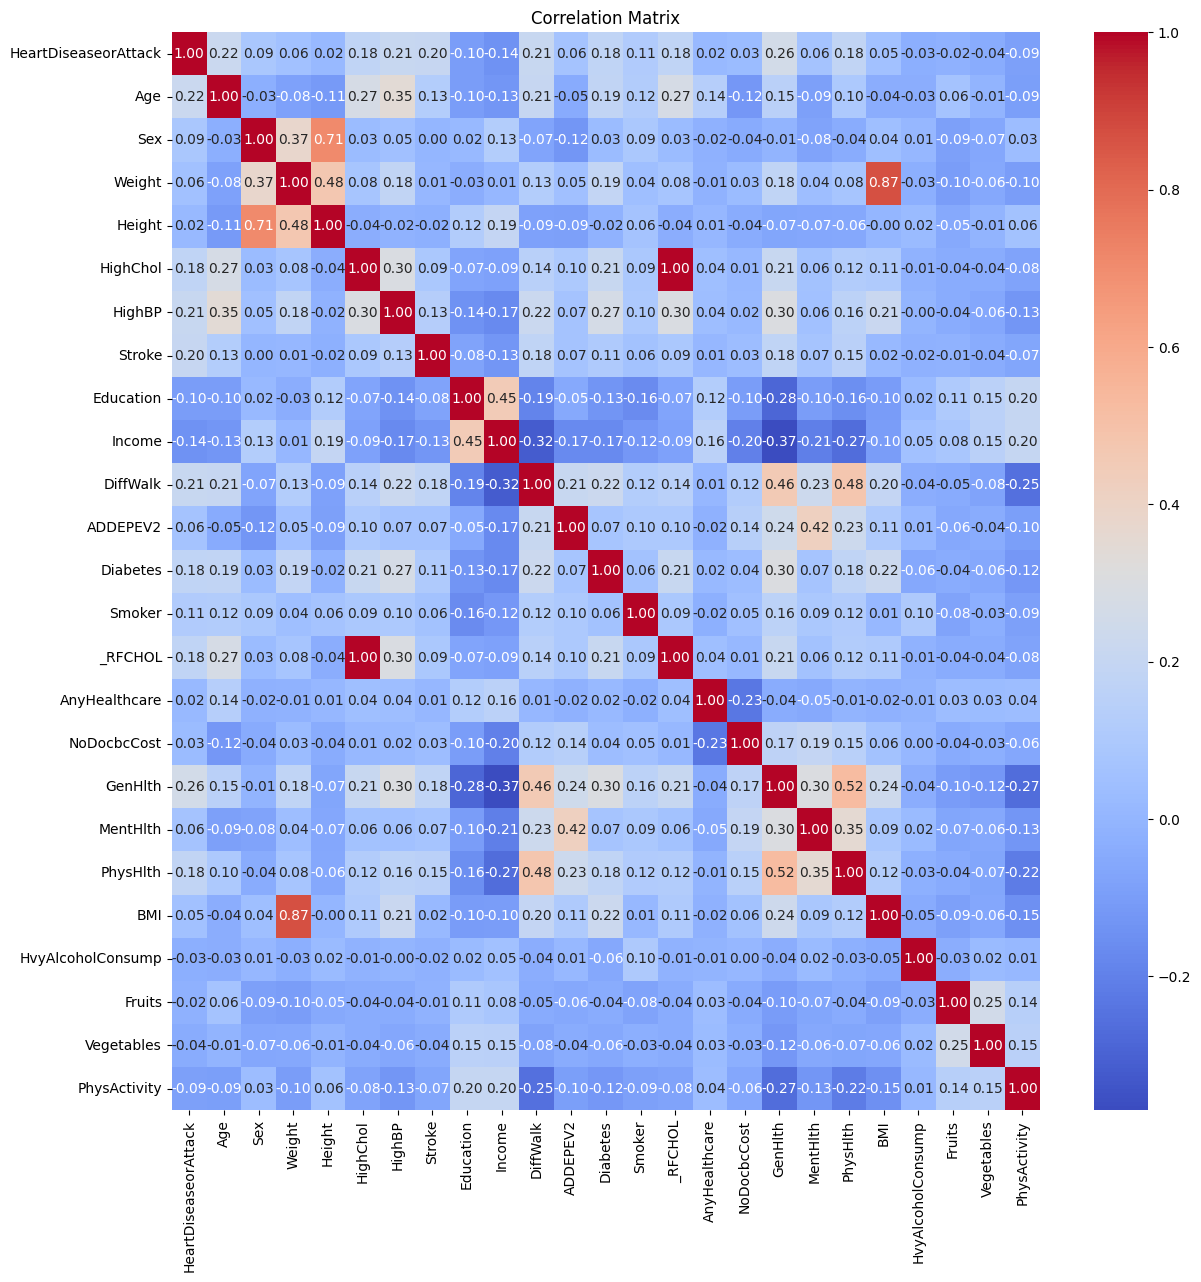

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Heatmap to visualize correlations
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [8]:
# Features with a strong positive or negative correlation (typically above 0.2 or below -0.2) can be important.
# Features that are highly correlated with each other (above 0.85) should be considered for removal, as they add redundancy to the model.
# Features with very low or no correlation with HeartDiseaseorAttack should be considered for removal.
# When two features are highly correlated, one of them can be dropped.

In [9]:
# Set the threshold for high correlation
correlation_threshold = 0.85

# Get the pairs of features that have correlation above the threshold
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            rowname = correlation_matrix.columns[j]
            correlated_features.add((colname, rowname))

print("Highly Correlated Features (> 0.85):")
print(correlated_features)


Highly Correlated Features (> 0.85):
{('BMI', 'Weight'), ('_RFCHOL', 'HighChol')}


In [10]:
# Drop features with low correlation with the target variable
low_corr_features = ['Sex', 'Height', 'Fruits', 'Vegetables', 'PhysActivity','Weight','_RFCHOL']
#df = df.drop(columns=low_corr_features)
df.columns

Index(['HeartDiseaseorAttack', 'Age', 'Sex', 'Weight', 'Height', 'HighChol',
       'HighBP', 'Stroke', 'Education', 'Income', 'DiffWalk', 'ADDEPEV2',
       'Diabetes', 'Smoker', '_RFCHOL', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'HvyAlcoholConsump', 'Fruits',
       'Vegetables', 'PhysActivity'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

categorical_cols = [
    'HighChol', 'HighBP', 'Stroke', 'DiffWalk',
    'ADDEPEV2', 'Diabetes', 'AnyHealthcare',
    'NoDocbcCost', 'HvyAlcoholConsump', 
]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Perform Chi-Square test
X = df[categorical_cols]
y = df["HeartDiseaseorAttack"]  # Target variable
chi_scores, p_values = chi2(X, y)

# Create a DataFrame for results
chi2_results = pd.DataFrame({"Feature": categorical_cols, "Chi-Square Score": chi_scores, "p-value": p_values})
chi2_results.sort_values(by="Chi-Square Score", ascending=False, inplace=True)

print("Chi-Square Test Results:")
print(chi2_results)

Chi-Square Test Results:
             Feature  Chi-Square Score        p-value
5           Diabetes      13583.523991   0.000000e+00
2             Stroke      10100.063131   0.000000e+00
3           DiffWalk       9611.716504   0.000000e+00
1             HighBP       6403.085786   0.000000e+00
0           HighChol       4810.114119   0.000000e+00
4           ADDEPEV2        859.376813  6.653351e-189
7        NoDocbcCost        221.544340   4.164175e-50
8  HvyAlcoholConsump        203.606171   3.411291e-46
6      AnyHealthcare          4.445348   3.499646e-02


In [12]:
# Based on the results of the Chi-Square Test, we can see that most of the features have very low p-values (close to zero), 
# indicating a strong association with the target variable HeartDiseaseorAttack.

In [13]:
# Check the distribution of the target variable (HeartDiseaseorAttack)
target_counts = df['HeartDiseaseorAttack'].value_counts()
print(target_counts)
print(f"Proportion of 0's: {target_counts[0] / len(df)}")
print(f"Proportion of 1's: {target_counts[1] / len(df)}")


HeartDiseaseorAttack
0.0    231193
1.0     23996
Name: count, dtype: int64
Proportion of 0's: 0.9059677337189299
Proportion of 1's: 0.09403226628107011


In [14]:
# # Import required libraries
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# # Assume your dataset is already loaded into cleaned_df
# # Define features and target variable
# X = cleaned_df.drop(columns=['HeartDiseaseorAttack'])  # Features
# y = cleaned_df['HeartDiseaseorAttack']  # Target variable

# # Split data into train and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 1. SMOTE - Create synthetic samples for the minority class
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # 2. Random Undersampling - Reduce majority class by random selection
# undersample = RandomUnderSampler(random_state=42)
# X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)

# # 3. Train models with both resampled datasets
# # Using RandomForestClassifier as an example
# model = RandomForestClassifier(random_state=42)

# # Train on SMOTE resampled data
# model.fit(X_train_smote, y_train_smote)
# y_pred_smote = model.predict(X_test)

# # Train on RandomUndersample resampled data
# model.fit(X_train_undersample, y_train_undersample)
# y_pred_undersample = model.predict(X_test)

# # 4. Evaluate models using classification report and ROC-AUC score
# print("SMOTE Model Evaluation:")
# print("Accuracy:", accuracy_score(y_test, y_pred_smote))
# print("Classification Report:\n", classification_report(y_test, y_pred_smote))
# print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_smote))

# print("\nRandom Undersampling Model Evaluation:")
# print("Accuracy:", accuracy_score(y_test, y_pred_undersample))
# print("Classification Report:\n", classification_report(y_test, y_pred_undersample))
# print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_undersample))


In [15]:
from imblearn.under_sampling import RandomUnderSampler

# Define the features and target
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# Apply Random Undersampling
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Check the distribution of the resampled target
print(f"Original distribution:\n{y.value_counts()}")
print(f"Resampled distribution:\n{y_resampled.value_counts()}")


Original distribution:
HeartDiseaseorAttack
0.0    231193
1.0     23996
Name: count, dtype: int64
Resampled distribution:
HeartDiseaseorAttack
0.0    23996
1.0    23996
Name: count, dtype: int64


In [17]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [18]:
y_pred = xgb.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC score
y_prob = xgb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.7639255452146131
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      7233
         1.0       0.74      0.80      0.77      7165

    accuracy                           0.76     14398
   macro avg       0.77      0.76      0.76     14398
weighted avg       0.77      0.76      0.76     14398

ROC-AUC Score: 0.8376628442427121


In [20]:
# Hyper tunning for better performance
from sklearn.model_selection import RandomizedSearchCV
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
}

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of combinations to try
    scoring='roc_auc',  # Optimize for AUC
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [21]:
# Best parameters and performance
print("Best Parameters:", random_search.best_params_)
print("Best ROC-AUC Score:", random_search.best_score_)

# Evaluate on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", best_model.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Best Parameters: {'subsample': 0.6, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.8}
Best ROC-AUC Score: 0.8484797727395718
Accuracy: 0.7787192665648006
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.73      0.77      7233
         1.0       0.75      0.83      0.79      7165

    accuracy                           0.78     14398
   macro avg       0.78      0.78      0.78     14398
weighted avg       0.78      0.78      0.78     14398

ROC-AUC Score: 0.8582328378046307


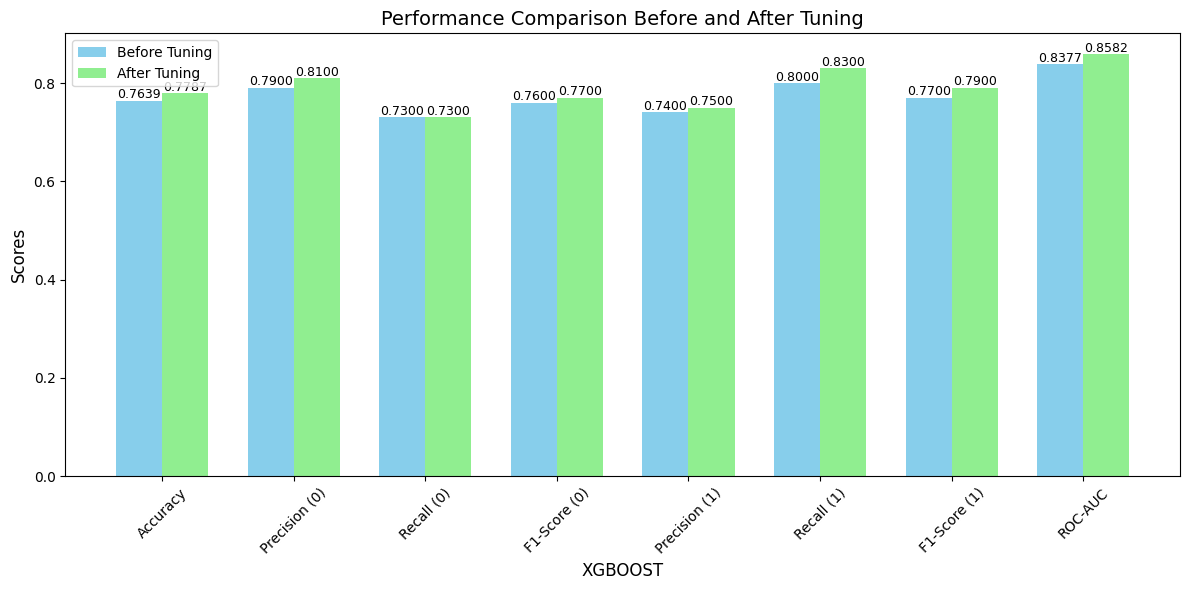

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics
metrics = ['Accuracy', 'Precision (0)', 'Recall (0)', 'F1-Score (0)', 
           'Precision (1)', 'Recall (1)', 'F1-Score (1)', 'ROC-AUC']
before_tuning = [0.7639, 0.79, 0.73, 0.76, 0.74, 0.80, 0.77, 0.8377]
after_tuning = [0.7787, 0.81, 0.73, 0.77, 0.75, 0.83, 0.79, 0.8582]

# Set positions for bars
x = np.arange(len(metrics))

# Create the bar plot
width = 0.35  # Width of the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning', color='skyblue')
bars2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning', color='lightgreen')

# Add titles and labels
ax.set_xlabel('XGBOOST', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Performance Comparison Before and After Tuning', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, fontsize=10)
ax.legend()

# Add values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.4f}', ha='center', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()
